In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import datetime as dt
import seaborn as sns
from scipy import stats as st
import math as mth
from pandas.plotting import register_matplotlib_converters
import warnings
register_matplotlib_converters()
import scipy.stats as stats

## Приоретизация гипотез

In [5]:
hypothesis = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/AB_tests/hypothesis.csv')
pd.options.display.max_colwidth = 100
display(hypothesis.head())

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


### Оценка гипотез методом ICE

In [6]:
hypothesis['ICE'] = (hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False))

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


При приоритизации гипотез методом ICE приоритет у 9 гипотезы (8 в индексах) - запустить акцию, дающую скидку на товар в день рождения.

### Оценка гипотез методом RICE

In [7]:
hypothesis['RICE'] = (hypothesis['Impact']*hypothesis['Confidence']*hypothesis['Reach'])/hypothesis['Efforts']
display(hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False))

,Hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средни...",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конве...",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


При приоритизации гипотез методом RICE приоритет у 8 гипотезы (7 в индексе) - добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок.

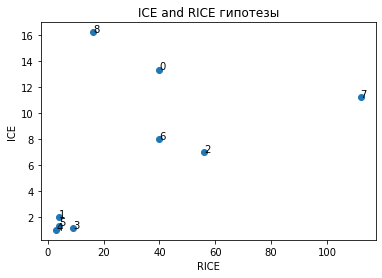

In [35]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")
plt.show()

**Выводы:**

Разница в двух методах - ICE и RICE - проверки гипотез заключается в том, что при проверке методом RICE помимо воздействия, усилий и уверенности в корректности, учитывается еще и показатель охвата аудитории. Получается, что добавление формы подписки, охватив большую часть пользователей, приведет к более существенным результатам для комании, чем даже проведение акции, которое хоть и является перспективной гипотезой для реализации с точки зрения воздействия, уверенности в результате и в относительной легкости по усилиям, тем не менее, охватывает лишь малую часть клиентов.

## Анализ A/B теста

In [10]:
orders = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/AB_tests/orders.csv')
visitors = pd.read_csv('/Users/dasakalinina/Desktop/Practicum/_all_projects/AB_tests/visitors.csv')

display(orders.head())
display(visitors.head())

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [11]:
#общая информация о данных
orders.info()
visitors.info()

#проверяю дубликаты
print('Общее число дубликатов в заказах:', orders.duplicated().sum())
print('Общее число дубликатов в посещениях:', visitors.duplicated().sum())

#проверяю пропуски
print('Общее число пропущенных значений в заказах:', orders.isna().sum())
print('Общее число пропущенных значений в посещениях:', visitors.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
Общее число дубликатов в заказах: 0
Общее число дубликатов в посещениях: 0
Общее число пропущенных значений в заказах: transactionId    0
visitorId        0
date             0
revenue          0
group

<b>Выводы:</b> <br>
- таблица orders состоит из 1197 строк, пропущенные значения и дубликаты отсутствуют
- таблица visitors состоит из 62 строк, пропущенные значения и дубликаты отсутствуют 
- столбцы date надо привести к формату to_datetime
</div> 

In [12]:
#pd.to_datetime(orders['date'])
#pd.to_datetime(visitors['date'])

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

#код ревьюера
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
#visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
orders.info()
visitors.info()

print(orders.head(), visitors.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   int64         
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 46.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      62 non-null     datetime64[ns]
 1   group     62 non-null     object        
 2   visitors  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB
   transactionId   visitorId       date  revenue group
0     36679

In [13]:
print('Значения в group таблицы orders:', orders['group'].sort_values().unique())
print('Количество в group таблицы orders:', len(orders['group'].unique()))

print('Значения в group таблицы visitors:', visitors['group'].sort_values().unique())
print('Количество в group таблицы visitors:', len(visitors['group'].unique()))

Значения в group таблицы orders: ['A' 'B']
Количество в group таблицы orders: 2
Значения в group таблицы visitors: ['A' 'B']
Количество в group таблицы visitors: 2


In [14]:
print('Дата старта теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())

print('Дата старта теста:', visitors['date'].min())
print('Дата окончания теста:', visitors['date'].max())

Дата старта теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00
Дата старта теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00


<b>Выводы:</b> <br>
с 1 по 31 августа 2019 проводился А/В тест в 2 группах: А и В.
</div> 

### Стабильность кумулятивных метрик

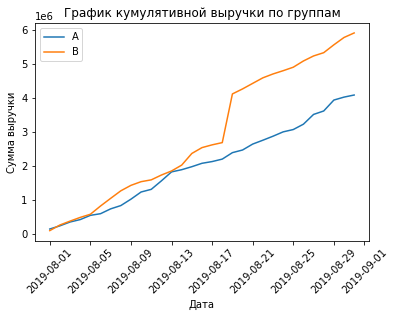

In [15]:
# построим график кумулятивной выручки по группам

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Сумма выручки')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

In [16]:
print('Дата старта теста:', orders['date'].min())
print('Дата окончания теста:', orders['date'].max())
print('Дата старта теста для группы А:', cumulativeRevenueA['date'].min())
print('Дата окончания теста для группы А:', cumulativeRevenueA['date'].max())
print('Дата старта теста для группы B:', cumulativeRevenueB['date'].min())
print('Дата окончания теста для группы B:', cumulativeRevenueB['date'].max())


Дата старта теста: 2019-08-01 00:00:00
Дата окончания теста: 2019-08-31 00:00:00
Дата старта теста для группы А: 2019-08-01 00:00:00
Дата окончания теста для группы А: 2019-08-31 00:00:00
Дата старта теста для группы B: 2019-08-01 00:00:00
Дата окончания теста для группы B: 2019-08-31 00:00:00


**Выводы:** даты старта и завершения теста совпадают. <br>

</div> 

**Выводы**<br>
<br>
По графикам кумулятивной выручки групп А и В видно, что в начале эксперимента они двигались практически вместе с очень небольшей разницей. Но в середине эксперимента график кумулятивной выручки группы B произвел резкий скачок и дальше продолжил движение по возрастающей примерно с тем же темпом, что и график кумулятивной выручки группы А. Можно предположить, что в середине эксперимента произошел какой-то особо крупный заказ или одновременно пришло очень много покупателей, что можно считать выбросом.

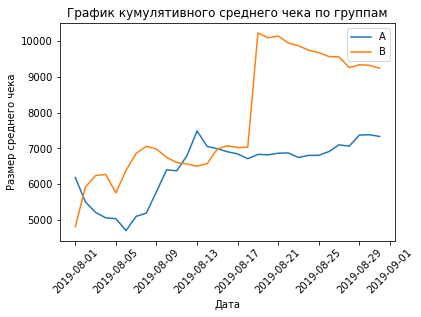

In [17]:
## построим график кумулятивного среднего чека по группам
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label = 'A')

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label = 'B')

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Размер среднего чека')
plt.xticks(rotation = 45)
plt.legend()
plt.show()

**Выводы**<br>
<br>
По графику кумулятивного среднего чека можно сделать следующие выводы:
- в начале эксперимента группа А показывала более высокий средний чек
- затем произошло 2 скачка в среднем чеке группы B и на это фоне еще и провал в группе А
- далее был скачок в группе А и затем размер среднего чека этой группы выровнялся
- в группе В после середины эксперимента был аномально высокий средний чек, далее кумулятивный средний чек снижается. Не похоже, что он зафиксировался

**Итог:** было несколько аномально крупных заказов, эти выбросы могут повлиять на корректность эксперимента

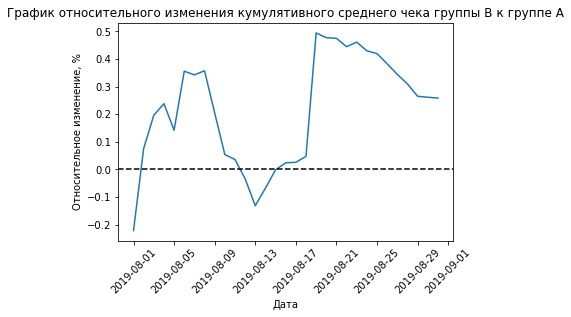

In [18]:
#построим график относительного изменения кумулятивного среднего чека группы B к группе A.

mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', right_on = 'date', how = 'left', suffixes=['A','B'])
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color = 'black', linestyle = '--')

plt.title('График относительного изменения кумулятивного среднего чека группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
plt.xticks(rotation = 45)
plt.show()

**Выводы**<br>
<br>
Результаты теста резко менялись несколько раз менялись в определенные даты. Видимо, именно в эти даты были совершены аномальные заказы.

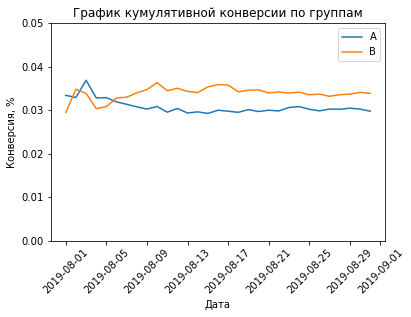

In [19]:
# построим график кумулятивной конверсии по группам. 

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
 
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label ='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label ='B')

plt.title('График кумулятивной конверсии по группам')
plt.xlabel('Дата')
plt.ylabel('Конверсия, %')
plt.xticks(rotation = 45)
plt.legend()

plt.ylim (0, 0.05)
plt.show()

**Выводы**<br>
<br>
В начале эксперимента кумулятивная конверсия у группы А и В менялась, и у группы А было ее значение более высоким. Затем показатели конверсии установилась на определенном уровне и кумулятивная конверсия группы В стала выше.

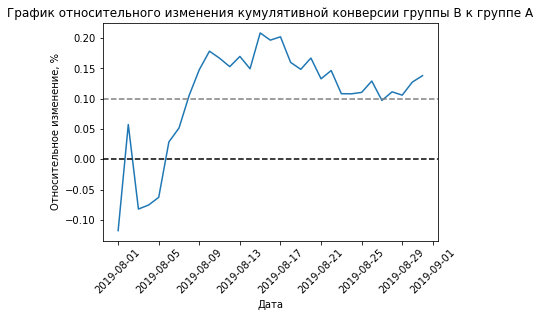

In [36]:
# построим график относительного изменения кумулятивной конверсии группы B к группе A
cumulativeData['conversion'] = (
    cumulativeData['orders'] / cumulativeData['visitors']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeConversions = cumulativeDataA[['date', 'conversion']].merge(cumulativeDataB[['date', 'conversion']], left_on = 'date', right_on = 'date', how = 'left', suffixes = ['A','B'])

plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)

plt.title('График относительного изменения кумулятивной конверсии группы В к группе А')
plt.xlabel('Дата')
plt.ylabel('Относительное изменение, %')
plt.xticks(rotation = 45)
plt.axhline(y=0,color='black',linestyle='--')
plt.axhline(y=0.1,color='grey',linestyle='--')
plt.show()

**Выводы**<br>
<br>
Спустя короткое время после старта теста кумулятивная конверсия группы В становилась все больше, пока не зафикисировалась на отметке около 10% выше относительно группы А.

### Анализ выбросов и всплесков

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


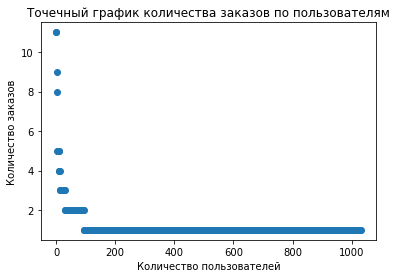

In [21]:
# построим точечный график количества заказов по пользователям
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId':'nunique'})
    .sort_values(by='transactionId', ascending=False)
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('Количество пользователей')
plt.ylabel('Количество заказов')

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

**Выводы**<br>
<br>
Исходя из точечного графика можно сделать вывод, что большинство пользователей сделало 1 заказ. Есть заказы до 5 штук, но их число очень небольшое. Больше 8 - это отдельные аномальные заказы.

In [22]:
# посчитаем 95-й и 99-й перцентили количества заказов на пользователя, выберем границу для определения аномальных пользователей.
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


**Выводы**<br>
<br>
Граница для определения нормального заказа пользователя - 4 штуки.

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  1294500     B
1196     3936777065  2108080724 2019-08-15   202740     B
858       192721366  1316129916 2019-08-27    93940     A
1136      666610489  1307669133 2019-08-13    92550     A
744      3668308183   888512513 2019-08-27    86620     B
682      1216533772  4266935830 2019-08-29    78990     B
662      1811671147  4266935830 2019-08-29    78990     A
743      3603576309  4133034833 2019-08-09    67990     A
1103     1348774318  1164614297 2019-08-12    66350     A
1099      316924019   148427295 2019-08-12    65710     A


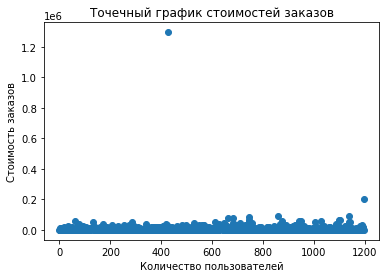

In [23]:
# построим точечный график стоимостей заказов
print(orders.sort_values(by='revenue', ascending=False).head(10))
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.show()

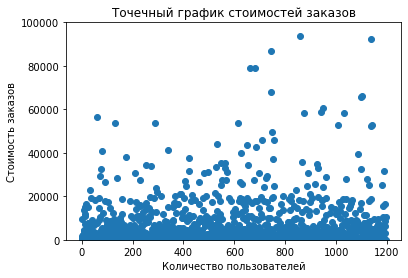

In [24]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.xlabel('Количество пользователей')
plt.ylabel('Стоимость заказов')
plt.ylim(0,100000)
plt.show()

**Выводы**<br>
<br>
Большая часть заказов не превышает 100000. Есть 2 аномальных выброса, один из которых - выручка более 1.2 млн.

In [25]:
print(np.percentile(orders['revenue'], [95,99]))

[28000.  58233.2]


**Выводы**<br>
<br>
Граница для нормального заказа составляет 58233 руб.

### Анализ A/B-теста

<div class="alert alert-block alert-info">
<b>Проверим гипотезы:<br><b>
1) что нет статистически значимых отличий между конверсиями пользователей группы А и группы В по сырым данным,<br>
2) что нет статистически значимых отличий между средним чеком пользователей группы А и группы В по сырым данным.<br>
</div>

Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным.

In [26]:
# изучим таблицу с исходными данными
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

display(data.head(5))

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


In [27]:
# в переменных ordersByUsersA и ordersByUsersB для пользователей, которые заказывали хотя бы 1 раз, 
# укажем число совершённых заказов

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders']

In [28]:
#объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0) 

In [29]:
#Посчитаем статистическую значимость различия конверсии по результатам двух недель теста посредством теста Манна-Уитни.
#Выведем p-value для сравнения конверсии между группами с округлением до 5 знаков после запятой.
#Вычислим относительное различие в конверсии между группами с округлением до 3 знаков после запятой.

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01679
0.138


p-value значительно меньше, чем 0.05%, поэтому нулевую гипотезу, что две выборки равны, отвергаем. Анализ сырых данных показывает, что есть статистически значимые отличия между двумя группами.<br>
При этом относительный прирост конверсии группы В относительно конверсии группы А равен 14%.

In [30]:
print('{0:.5f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.72929
0.259


Интересно, что p-value значительно больше, чем 0.05%, поэтому нулевую гипотезу, что две выборки равны по среднему чеку принимаем. Т.е. анализ сырых данных показывает, что есть статистически значимые отличия между двумя группами отсутствует.<br>
При этом относительное различие между чеками двух групп состаляет 25%, что видится значимой величиной.

<div class="alert alert-block alert-info">
<b>Проверим гипотезы:<br><b>
1) что нет статистически значимых отличий между конверсиями пользователей группы А и группы В по очищенным данным,<br>
2) что нет статистически значимых отличий между средним чеком пользователей группы А и группы В по очищенным данным.<br>
</div>

Посчитаем статистическую значимость различий в конверсии между группами по очищенным от выбросов данным.

Найденные 95-й и 99-й перцентили средних чеков равны 28 000 и 58 233 руб. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.
Примем за аномальных пользователей тех, кто совершил от 2 заказов или совершил заказ дороже 30 000 рублей. Так мы уберём 5% пользователей с наибольшим числом заказов и от 1 до 5% пользователей с дорогими заказами.

In [31]:
revenue_max=np.percentile(orders['revenue'], [95, 99])[0]
orders_max=np.percentile(ordersByUsers['orders'], [95, 99])[0]

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > orders_max]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > orders_max]['userId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders[orders['revenue'] > revenue_max]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
37      249864742
dtype: int64
74


Получается всего 68 аномальных пользователей.

Проверим, как их действия повлияли на результаты теста. Посчитаем статистическую значимость различий в конверсии между группами теста по очищенным данным.

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [33]:
#применим статистический критерий Манна-Уитни к полученным выборкам
print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01304
0.173


Результаты по неочищенным данным были 0.01679, 0.138. Таким образом, существенных изменений после очищения выборок не произошло. Есть статическая значимость в конверсии пользователей в двух группах.

In [34]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.738
-0.020


Результаты по средним чекам по неочищенным данным были 0.72929, 0.259. Таким образом, после очищения выборок все также нет статистически значимых отличия между средними чеками двух групп. Разница между сегментами уменьшилась с 25% до 2%. Т.е. предыдущий разброс был за счет аномалий.

## Выводы

По результатам проведенного иследования выяснили, что:<br>
1) нет статистически значимого различия по конверсии между группами ни по «сырым», ни по данным после фильтрации аномалий;<br>
2) есть статистически значимое различие по среднему чеку между группами и по «сырым», и по данным после фильтрации аномалий;<br>
3) График различия конверсии между группами сообщает, что результаты группы B улучшаются на протяжении эксперимента и сейчас почти на 10% лучше, чем в начале;<br>
4) График различия среднего чека говорит о том, что средний чек каждой группы очень существенно менялся на протяжении теста, что подтверждается анализом очищенных данных.<br>

Исходя из обнаруженных фактов, тест можно остановить и **признать его успешным**. При имеющихся данных **сегмент B лучше сегмента A по конверсии пользователей**.